# Problem Set 1, due September 4th at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.1.0 (need at least 1.0)
Numpy version:        1.13.1 (need at least 1.7.1)
SciPy version:        0.19.1 (need at least 0.12.0)
Pandas version:       0.20.3 (need at least 0.11.0)
Maplotlib version:     2.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.0 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
#1.1.1: Checking the shape of the table, remembering that MEDV is not included 
#as a variables in the original boston table (target attribute)
print("1.1.1")
r, c = boston.shape
print("There are", c, "variables, 1 class/target attribute (MEDV) and ", end = '')
print(r, "different observations")
print("We will treat MEDV as another variable (14 variables)")


#1.1.2: Checking the shape of the table after filtering by CHAS
print("\n1.1.2")
r2, c2 = boston[boston['CHAS'] == 1].shape
print("There are", r2, "instances classified as neighborhoods ",end = '') 
print("where the tract bounds the Charles River")


#1.1.3: Counting the missing values and summing them
print("\n1.1.3")
print("There are", boston.isnull().sum().sum(), "missing values")

 
#1.1.4 
# We add MEDV as a new columns inside boston DataFrame (DF)
# Version 1: taking the first 5 that are obtained after sorting MEDV
print("\n1.1.4")
boston['MEDV'] = bdata.target
print("Version 1")
print("Top 5 Propery tax rate in neighborhoods with ",end = '') 
print("highest median housing price")
for i in boston.sort_values(['MEDV'], ascending = 0)[0:5]['TAX']:
    print("      Tax:", i)    

# Version 2: taking the first 5 sorting MEDV and Index
# An auxiliary DF is created with a column reflecting the index
# of each entry. Then we sort by both MEDV and Index colums
print("\nVersion 2")
boston_medv = pd.DataFrame({"MEDV":boston['MEDV'],
                            "IndexC":boston.index,
                            "TAX":boston['TAX']})
boston_medv = boston_medv.sort_values(['MEDV', 'IndexC'], 
                                      ascending = [False, True])
print("Top 5 Propery tax rate (index ordered) in neighborhoods with ", end = '') 
print("highest median housing price")
for i in boston_medv[0:5]['TAX']:
    print("      Tax:", i)    

1.1.1
There are 13 variables, 1 class/target attribute (MEDV) and 506 different observations
We will treat MEDV as another variable (14 variables)

1.1.2
There are 35 instances classified as neighborhoods where the tract bounds the Charles River

1.1.3
There are 0 missing values

1.1.4
Version 1
Top 5 Propery tax rate in neighborhoods with highest median housing price
      Tax: 198.0
      Tax: 307.0
      Tax: 666.0
      Tax: 666.0
      Tax: 666.0

Version 2
Top 5 Propery tax rate (index ordered) in neighborhoods with highest median housing price
      Tax: 403.0
      Tax: 403.0
      Tax: 403.0
      Tax: 403.0
      Tax: 193.0


#### *Provide our answers below:*

 - 1.1.1: 14 variables ($MEDV$ is a class attribute in the original dataset) and 506 observations
 - 1.1.2: 35 instances
 - 1.1.3: 0 missing values
 - 1.1.4: Since we have more than 5 entries with maximum $MEDV$ value (50.0) we developed two versions:
    - Version 1: after sorting by $MEDV$ value, we take the first 5 $TAX$ entries: 198.0, 307.0, 666.0, 666.0, 666.0
    - Version 2: we create an auxiliary column with the indexes. Then, we sort the new table by $MEDV$ and $INDEX$ values,                obtaining the first 5 $TAX$ values, associated to the lower indexes/entries: 403.0, 403.0, 403.0, 403.0, 193.0


### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [7]:
# 1.2.1: sort by relevant variable and output the value
print("1.2.1")
# Version 1
print("Version 1")
# If LSTAT indicates the neighborhood's economic status (lower the best)
for i in boston.sort_values(['LSTAT'], ascending = 1)[0:1]['MEDV']:
    print("The median house price in Boston's most expensive neighborhood is", i)

# Version 2
print("\nVersion 2")
# If MEDV is the only relevant indicator (higher the best)
for i in boston.sort_values(['MEDV'], ascending = 0)[0:1]['MEDV']:
    print("The median house price in Boston's most expensive neighborhood is", i)

    
# 1.2.2: Check the condition and report the shape
print("\n1.2.2")
r3, c3 = boston[boston["RM"] < 5].shape
print("There are",r3,"neighborhoods that - on average - ", end = '')
print("have less than 5 rooms per dwelling")


# 1.2.3
print("\n1.2.3")
# Version 1: If MEDV is the only relevant indicator
print("Version 1")
for i in boston[boston['CHAS'] == 1].sort_values(['MEDV'], ascending = 0)['TAX'][0:1]:
    print("The tax rate in the most expensive ", end = '')
    print("neighborhood adjacent to Charles River is", i)

# Version 2: if LSTAT must be taken into account
print("\nVersion 2")
boston2 = boston[boston['CHAS'] == 1].sort_values(['LSTAT'], ascending = 1)
for i in boston2.sort_values(['MEDV'], ascending = 0)['TAX'][0:1]:
    print("The tax rate in the most expensive ", end = '')
    print("neighborhood adjacent to Charles River is", i)    

# Version 3: MEDV and lowest index value
print("\nVersion 3")
boston_tax = pd.DataFrame({"MEDV":boston['MEDV'],
                           "CHAS":boston['CHAS'],
                            "IndexC":boston.index,
                            "TAX":boston['TAX']})
boston_tax = boston_tax[boston_tax['CHAS'] == 1]
boston_tax = boston_tax.sort_values(['MEDV', 'IndexC'], 
                                    ascending = [False, True])
for i in boston_tax.sort_values(['MEDV'], ascending = 0)['TAX'][0:1]:
    print("The tax rate in the most expensive ", end = '')
    print("neighborhood adjacent to Charles River is", i)    

    
# 1.2.4
print("\n1.2.4")
# Version 1: taking the first one obtained after sorting MEDV
print("Version 1")
for i in boston.sort_values(['MEDV'], ascending = 0)[0:1]['CRIM']:
    print("The crime rate in the neighborhood with the highest ", end = '')
    print("median housing price is", i)

# Version 2: taking the first one obtained after sorting MEDV and lowest index    
print("\nVersion 2")
boston_crime = pd.DataFrame({"MEDV":boston['MEDV'],
                             "CRIM":boston['CRIM'],
                             "IndexC":boston.index,})
boston_crime = boston_crime.sort_values(['MEDV', 'IndexC'], 
                                         ascending = [False, True])
for i in boston_crime[0:1]['CRIM']:
    print("The crime rate in the neighborhood with the highest ", end = '')
    print("median housing price is", i)    

    
# 1.2.5
print("\n1.2.5")
# Version 1: taking the first one obtained after sorting MEDV
print("Version 1")
for i in boston.sort_values(['MEDV'], ascending = 1)[0:1]['CRIM']:
    print("The crime rate in the neighborhood with the lowest ", end = '')
    print("median housing price is", i)
    
# Version 2: taking the first one obtained after sorting MEDV and lowest index    
print("\nVersion 2")
boston_crime = boston_crime.sort_values(['MEDV', 'IndexC'], 
                                         ascending = [True, True])
for i in boston_crime[0:1]['CRIM']:
    print("The crime rate in the neighborhood with the highest ", end = '')
    print("median housing price is", i)   

1.2.1
Version 1
The median house price in Boston's most expensive neighborhood is 50.0

Version 2
The median house price in Boston's most expensive neighborhood is 50.0

1.2.2
There are 15 neighborhoods that - on average - have less than 5 rooms per dwelling

1.2.3
Version 1
The tax rate in the most expensive neighborhood adjacent to Charles River is 666.0

Version 2
The tax rate in the most expensive neighborhood adjacent to Charles River is 403.0

Version 3
The tax rate in the most expensive neighborhood adjacent to Charles River is 403.0

1.2.4
Version 1
The crime rate in the neighborhood with the highest median housing price is 0.01501

Version 2
The crime rate in the neighborhood with the highest median housing price is 1.46336

1.2.5
Version 1
The crime rate in the neighborhood with the lowest median housing price is 38.3518

Version 2
The crime rate in the neighborhood with the highest median housing price is 38.3518


*Provide our answers below:*

 - 1.2.1: \$50,000 ($MEDV$ in \$1,000)
 - 1.2.2: 15 neighborhoods
 - 1.2.3: Since we have more than 1 entry with maximum $MEDV$ value (50.0) we developed three versions (all of them have $MEDV$ = 50.0).
   - Version 1: sorting by $MEDV$ value and taking the first entry = 666.0
   - Version 2: using $LSTAT$ value for sorting =  403.0
   - Version 3: sorting by $MEDV$ value and taking the entry with the lowest value = 403.0
<br>
<br>
 - 1.2.4: Since we have more than 1 entry with maximum $MEDV$ value (50.0) we developed two versions (all of them have $MEDV$ = 50.0).
   - Version 1: sorting by $MEDV$ value and taking the first entry = 0.01501
   - Version 2: sorting by $MEDV$ value and taking the entry with the lowest value = 1.46336
<br>
<br>
 - 1.2.5: Since we have more than 1 entry with maximum $MEDV$ value (50.0) we developed two versions (all of them have $MEDV$ = 5.0).
   - Version 1: sorting by $MEDV$ value and taking the first entry = 38.3518
   - Version 2: sorting by $MEDV$ value and taking the entry with the lowest value = 38.3518

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [8]:
# Descriptive table
# Version 1: var_name as a column (not index)
boston_v = boston.columns
bostonDesc = pd.DataFrame({'var_name':boston.columns,
                           'valid_entries':boston.notnull().sum(), 
                           'mean':boston[boston_v].mean(), 
                           'sd':boston[boston_v].std(),
                           'min':boston[boston_v].min(),
                           'median':boston[boston_v].median(),
                           'max':boston[boston_v].max()})

bostonDesc = bostonDesc[['var_name', 'valid_entries', 'mean', 'sd', 'min', 'median', 'max']]
bostonDesc.index = np.arange(len(boston_v))
print("Version 1")
display(bostonDesc)

# Version 2: var_name as an index
boston_v2 = boston.columns
bostonDesc2 = pd.DataFrame({'valid_entries':boston.notnull().sum() , 
                           'mean':boston[boston_v].mean(), 
                           'sd':boston[boston_v].std(),
                           'min':boston[boston_v].min(),
                           'median':boston[boston_v].median(),
                           'max':boston[boston_v].max()}, index = boston.columns)

bostonDesc2 = bostonDesc2[['valid_entries', 'mean', 'sd', 'min', 'median', 'max']]
bostonDesc2.index.name = 'var_names'
print("\n\nVersion 2")
bostonDesc2

Version 1


,var_name,valid_entries,mean,sd,min,median,max
0,CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000




Version 2


,valid_entries,mean,sd,min,median,max
var_names,,,,,,
CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [9]:
# We have (at least) 3 different methods for calculating the test
# the first one -using scipy- is the most efficient and direct (see results)

# Version 1
# Scipy implementation: we create the groups
print("\nScipy implementation")
group1 = boston[boston['CHAS'] == 1]["MEDV"]
group2 = boston[boston['CHAS'] == 0]["MEDV"]

# Step 1: Leneve's test (null hypothesis: variances are equal)
# We check if both group variances are equal or not using Levene's test
print("Levene's test: null hypothesis of equal variances")
LeveneResults = sp.stats.levene(group1, group2)
StatisticL, p_valueLev = LeveneResults
LeveneT = pd.DataFrame({'Test Statistics': StatisticL, 
                        'p-value':p_valueLev}, index = ["Levene Test"])
display(LeveneT)

# Depending on the result, create an aux variable for performing 
# the pertinent t-test
if p_valueLev < 0.05:
    print("Null hypothesis is rejected (p-value < 0.05), ", end = '') 
    print("we perform unequal variance t-test")
    equalvar = False
else:
    print("Null hypothesis is not rejected (p-value > 0.05), ", end = '') 
    print("we perform equal variance t-test")
    equalvar = True

# Step 2: perform the pertinent t-test (equal or unequal variance)
# t-test using scipy package stats.ttest_ind function
print("\nT-Test: null hypothesis equal means")
twosample_results = sp.stats.ttest_ind(group1, group2, equal_var = equalvar)
TestStatistic, p_value = twosample_results

# Table label
if equalvar == False:
    indexTest = "T-Test Unequal Var"
else:
    indexTest = "T-Test equal Var"
resultsT = pd.DataFrame({'Test Statistics': TestStatistic, 
                         'p-value':p_value}, index = [indexTest])
display(resultsT)

# Print conclusion
if p_value < 0.05:
    print("Null hypothesis is rejected (p-value < 0.05), ", end = '') 
    print("we reject the hypothesis that prices are equivalent")
else:
    print("Null hypothesis is not rejected (p-value > 0.05), ", end = '') 
    print("we can not reject that prices are equivalent")
    

# Version 2
# Step by step method (mean, std, valid entries and test value)
boston_cha1 = boston[boston["CHAS"] == 1]
cha1_mean = boston_cha1["MEDV"].mean()
cha1_std = boston_cha1["MEDV"].std()
rc1, cc1 = boston_cha1.shape

boston_cha0 = boston[boston["CHAS"] == 0]
cha0_mean = boston_cha0["MEDV"].mean()
cha0_std = boston_cha0["MEDV"].std()
rc0, cc0 = boston_cha0.shape

print("\n\nStep by step method")
print("Mean values:\n","CHAS = 1:", cha1_mean, "\n CHAS = 0:", cha0_mean)
print("STD values:\n","CHAS = 1:", cha1_std, "\n CHAS = 0:", cha0_std)
print("Valid values:\n","CHAS = 1:", rc1, "\n CHAS = 0:", rc0)
TTest = (cha1_mean - cha0_mean) /  \
        (cha1_std ** 2 / rc1 + cha0_std ** 2 / rc0) ** (1 / 2)
print("TTest value:",TTest)


# Version 3
# Direct method: groupby function
mean0, mean1 = boston.groupby('CHAS').mean()["MEDV"]
std0, std1 = boston.groupby('CHAS').std()["MEDV"]
rc0, cc0 = boston[boston["CHAS"] == 0].shape
rc1, cc1 = boston[boston["CHAS"] == 1].shape

print("\nDirect method: groupby function")
print("Mean values:\n","CHAS = 1:", mean1, "\n CHAS = 0:", mean0)
print("STD values:\n","CHAS = 1:", std1, "\n CHAS = 0:", std0)
print("Valid values:\n","CHAS = 1:", rc1, "\n CHAS = 0:", rc0)
TTest2 = (mean1 - mean0) / (std1 **2 / rc1 + std0 **2 / rc0) ** (1 / 2)
print("TTest value:",TTest2)

# We compute the degree of freedom and calculate the p-value
dof = (std1 ** 2 / rc1 + std0 ** 2 / rc0) ** 2 / \
      ((std1 ** 2 / rc1 ) ** 2 / (rc1 - 1) + ((std0 ** 2 / rc0) ** 2) / (rc0 - 1))
print("Degree of freedom value:",dof)
pval = sp.stats.t.sf(np.abs(TTest2), dof)*2

# Output the final results from direct methods (version 2 and 3)
resultsDirect = pd.DataFrame({'Test Statistics': TTest2, 
                              'p-value':pval}, index = [indexTest])
display(resultsDirect)


# Testing purposes: equal variance test results
# For checking purposes, we perform the t-test with the 
# equal variance assumption
print("\n\nTesting purposes: Equal variance test")
twosample_results = sp.stats.ttest_ind(group1, group2, equal_var = True)
TestStatistic2, p_value2 = twosample_results
resultsT2 = pd.DataFrame({'Test Statistics': TestStatistic2, 
                          'p-value':p_value2}, index = ['T-Test Equal Var'])
display(resultsT2)



Scipy implementation
Levene's test: null hypothesis of equal variances


,Test Statistics,p-value
Levene Test,4.590342,0.032631


Null hypothesis is rejected (p-value < 0.05), we perform unequal variance t-test

T-Test: null hypothesis equal means


,Test Statistics,p-value
T-Test Unequal Var,3.113291,0.003567


Null hypothesis is rejected (p-value < 0.05), we reject the hypothesis that prices are equivalent


Step by step method
Mean values:
 CHAS = 1: 28.44 
 CHAS = 0: 22.0938428875
STD values:
 CHAS = 1: 11.8166432976 
 CHAS = 0: 8.83136240958
Valid values:
 CHAS = 1: 35 
 CHAS = 0: 471
TTest value: 3.11329131279

Direct method: groupby function
Mean values:
 CHAS = 1: 28.44 
 CHAS = 0: 22.0938428875
STD values:
 CHAS = 1: 11.8166432976 
 CHAS = 0: 8.83136240958
Valid values:
 CHAS = 1: 35 
 CHAS = 0: 471
TTest value: 3.11329131279
Degree of freedom value: 36.8764087976


,Test Statistics,p-value
T-Test Unequal Var,3.113291,0.003567




Testing purposes: Equal variance test


,Test Statistics,p-value
T-Test Equal Var,3.996437,0.000074


## First step: homogeneity of variance assumption
> By default, the independent t-test assumes that the variances of the two relevant groups are identical/equal across the population. However, if the assumption is not correct, the Type I error rate can be affected. Hence, we need to test this assumption (homogeneity of variance) using a pertinent test: Levene's Test for Equality of Variances.

> Using this test, we obtain an F-statistic and an associated p-value (significance). Using a 95% of significance, if p-value > 0.05, we can not reject the null hypothesis of homogeneity of variances so our group variances can be treated as equal, leading us to perform an equal variance t-test. Otherwise, if p-value < 0.05, then we can reject the null hypothesis, violating the assumption of homogeneity of variances. Hence, a non-equal variance t-test should be performed (known as Welch's t-test).

> Looking at the results, we can reject the null hypothesis, leading us to perform a non-equal variance t-test.

## Second step: t-test
> Based on the results obtained from the unequal-variance t-test (and also from the one assuming equal variances), we can see that the null hypothesis is rejected for a significance level of 95% (p-value < 0.05) and thus, we can reject the hypothesis that prices are equivalent within both groups of observations. 

> In addition, since p-value < 0.01, we can obtain the same conclusion for a significance level of 99%.

### Formulas (unequal-variance test)
\begin{align}
t\quad &=&\quad {\;\overline {X}_{1}-\overline {X}_{2}\; \over {\sqrt  {\;{s_{1}^{2} \over N_{1}}\;+\;{s_{2}^{2} \over N_{2}}\quad }}}\\
\nu \quad & \approx & \quad {{\left(\;{s_{1}^{2} \over N_{1}}\;+\;{s_{2}^{2} \over N_{2}}\;\right)^{2}} \over {\quad {s_{1}^{4} \over N_{1}^{2}\nu _{1}}\;+\;{s_{2}^{4} \over N_{2}^{2}\nu _{2}}\quad }} \\
\nu _{i} &=& N_{i}-1
\end{align}

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


(array([  0.,   0.,   0.,   0.,   0.,   3.,   1.,   7.,  10.,   3.,  10.,
          9.,   9.,  24.,  18.,  16.,  16.,  22.,  25.,  37.,  36.,  31.,
         35.,  37.,  25.,  11.,   8.,   9.,  10.,  10.,   7.,   8.,   7.,
          9.,   5.,   4.,   6.,   5.,   1.,   1.,   0.,   2.,   2.,   3.,
          2.,   1.,   2.,   0.,   3.,  16.]),
 array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
          7000.,   8000.,   9000.,  10000.,  11000.,  12000.,  13000.,
         14000.,  15000.,  16000.,  17000.,  18000.,  19000.,  20000.,
         21000.,  22000.,  23000.,  24000.,  25000.,  26000.,  27000.,
         28000.,  29000.,  30000.,  31000.,  32000.,  33000.,  34000.,
         35000.,  36000.,  37000.,  38000.,  39000.,  40000.,  41000.,
         42000.,  43000.,  44000.,  45000.,  46000.,  47000.,  48000.,
         49000.,  50000.]),
 <a list of 50 Patch objects>)

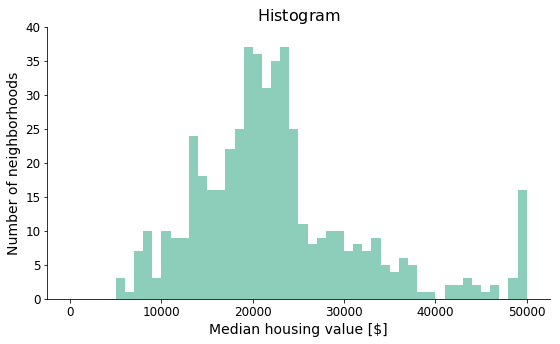

In [10]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  


# General settings
# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Figure size
plt.figure(figsize = (9, 5)) 

# Axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
plt.ylim([0,40])

# Title and labels
plt.title(r'$\mathrm{Histogram}$')
plt.xlabel(r'Median housing value [$]')
plt.ylabel(r'Number of neighborhoods')

# Change binsize (array)
binsize = np.arange(0.0, 51000, 1000)

# Plot
plt.hist(bdata.target * 1000, bins = binsize,  color = '#1b9e77', alpha = 0.5)

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


Variables CRIM and MEDV correlation: -0.385831689884


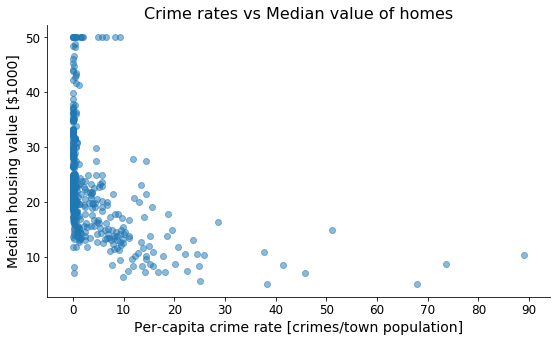

In [11]:
# Scatter plot median value of the home (y) and per-capita crime rate (x)
# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Ticks
plt.xticks(np.arange(boston['CRIM'].min(), boston['CRIM'].max() + 10, 10))

# Title and labels
plt.title(r'Crime rates vs Median value of homes')
plt.xlabel(r'Per-capita crime rate [crimes/town population]')
plt.ylabel(r'Median housing value [$1000]')

# Plot
plt.scatter(boston['CRIM'], boston['MEDV'], alpha = 0.5)

# Correlation
Corr_CRIM_MEDV = boston[["CRIM", "MEDV"]].corr().loc["CRIM","MEDV"]
print('Variables CRIM and MEDV correlation:', Corr_CRIM_MEDV)

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

### Interpretation
> Based on the scatter plot, we can see a pattern where towns with less per-capita crime rates tend to reach (have access to) larger values of median housing than those towns with higher crime levels. We can observe that when the crime rate is below 10, we could find towns that reach the maximum median housing value (\$50,000). When crime ratios increase, the maximum median housing values that can be reached are below $20,000. Their correlation value (Pearson) is equal to **-0.38583**, indicating us the existence of a negative correlation between these two variables.  

> Although we can think about a causal relationship between these two variables such that "a town with higher levels of criminality negatively impacts the housing prices in Boston's towns", we do not have concrete evidence to conclude that the relationship is causal and not just a correlation. It could be the case that the direction of our claim is wrong, such that, instead of having that crime rates affect the housing prices in Boston, we actually have the opposite effect: higher housing prices lead to smaller crime rates because these towns are better protected, they have more resources allocated to security, police tend to be around the area, among other possibilities. We can not reject this possibility with our current data. In order to check our hypothesis, an experiment should be performed in order to be able to see and collect useful results from which we can derive causal conclusions/evidence. Thus we cannot make any conclusion regarding the existence or the direction of a cause-and-effect relationship only from the fact that housing prices in Boston and crime rates are correlated. Further investigation is needed in order to determine whether there is an actual cause-and-effect relationship or not.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

Min Corr: -0.769230113226 Max Corr: 0.910228188533
Variables with minimum correlation
 NOX
 DIS
Variables with maximum correlation
 RAD
 TAX


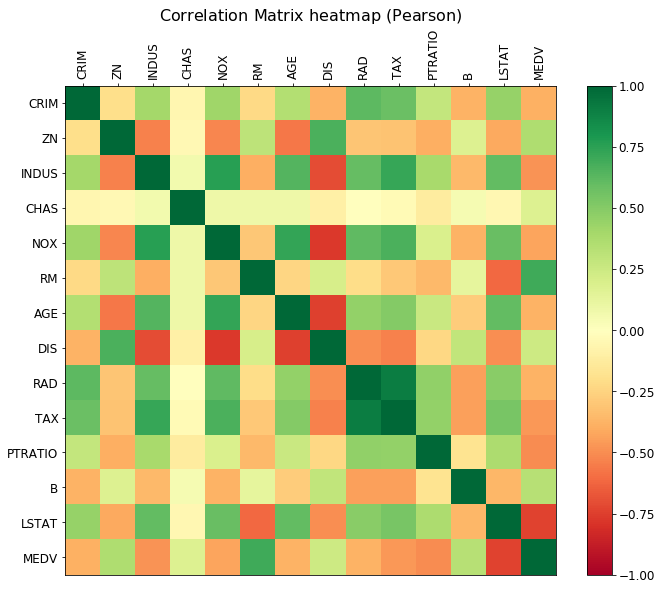

In [12]:
# Correlation matrix
corr = boston.corr()              #Correlation matrix
xlabels = boston.columns          #X labels
ylabels = boston.columns          #X labels

# Figure size and axes
fig, ax = plt.subplots(figsize = (11, 9))
ax.set_xticks(np.arange(boston.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(boston.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.xticks(rotation = 90)
ax.set_xticklabels(xlabels, minor = False)
ax.set_yticklabels(ylabels, minor = False)

# Plot the heatmap and colorbar. Add title
heatmap = plt.pcolor(corr, cmap = 'RdYlGn', vmin = -1, vmax = corr.max().max())
plt.title(r'$\mathrm{Correlation\ Matrix\ heatmap\ (Pearson)}$', y = 1.12)
plt.colorbar()


# Analysis: Min and Max (below 1) correlations
minCorr = corr.min().min()
corr2 = corr[corr < 1]
maxCorr = corr2.max().max()
print("Min Corr:", minCorr, "Max Corr:", maxCorr)

# New dfs with min and max correlations
corrmins = pd.DataFrame(corr.min(), columns = ['MinCorr'])
corrmaxs = pd.DataFrame(corr2.max(), columns = ['MaxCorr'])

# Get variable names for max/min correlations
print('Variables with minimum correlation') 
for i in corrmins[corrmins['MinCorr'] == minCorr].index.tolist():
    print("", i)

print('Variables with maximum correlation') 
for i in corrmaxs[corrmaxs['MaxCorr'] == maxCorr].index.tolist():
    print("", i)

## Based on the heatmap:

> ### a) Most positively (ranking): 
1. $RAD$ and $TAX$
2. $NOX$ and $INDUS$ 
3. $AGE$ and $NOX$ 
4. $TAX$ and $INDUS$ 

> ### b) Most negatively (ranking): 
1. $NOX$ and $DIS$
2. $AGE$ and $DIS$
3. $DIS$ and $INDUS$
4. $LSTAT$ and $MEDV$
   
------------------------------------------------------------------------------------------------------   
   
## Based on our analysis (checking purposes):

> ### a) Most positively: 
 - $RAD$ and $TAX$: 0.910228188533
   
> ### b) Most negatively: 
 - $NOX$ and $DIS$: -0.769230113226   

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

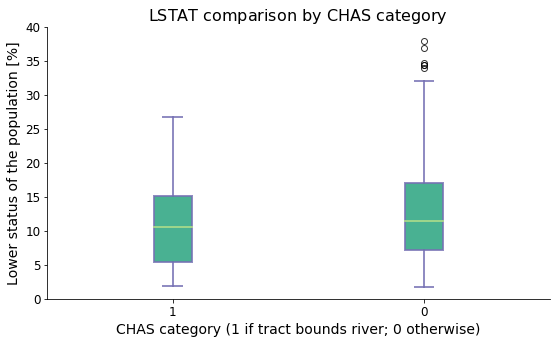

Seaborn version:       0.8.0 


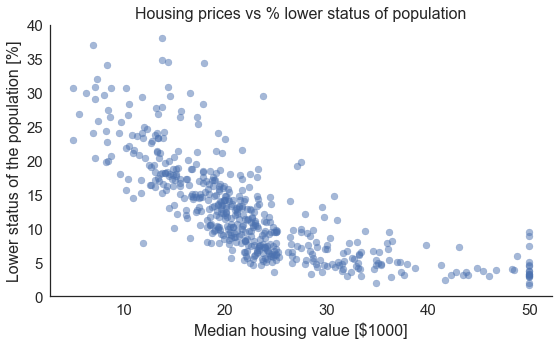

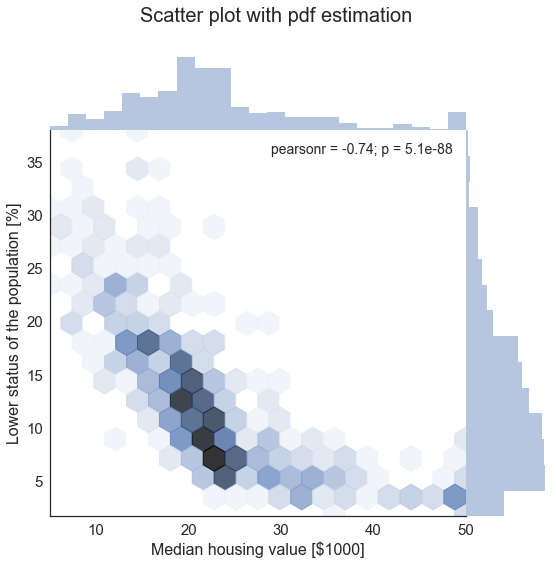

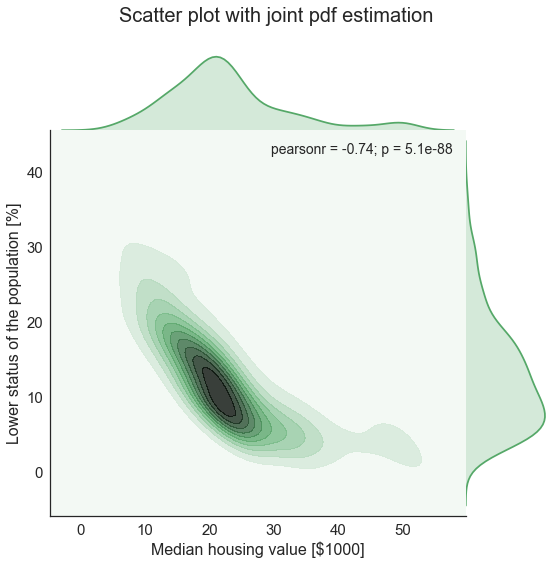

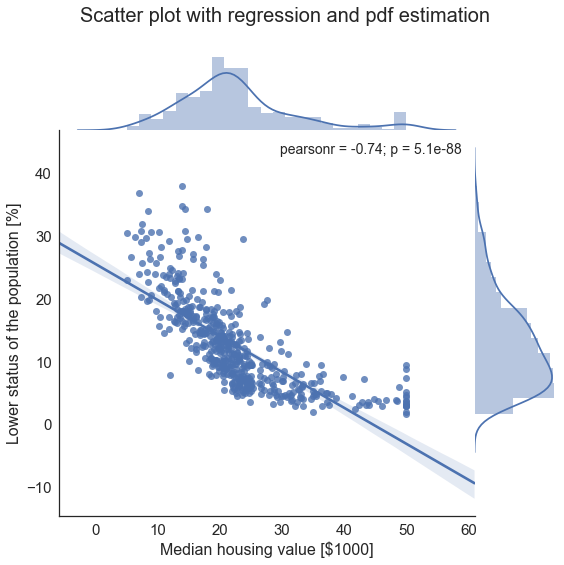

In [13]:
# Several useful plots for analyzing the data are provided

# 1) BoxPlot CHAS (categorical) vs (any) other variable
# useful for distribution, mean and independence comparisons depending
# on categorical variables.
Variable = 'LSTAT'   # global variable name for generating the boxplots
Unit = '[%]'       # variable units
Label = 'Lower status of the population [%]'

# Figure size
fig = plt.figure(1, figsize = (9, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Boxplot 
bp = plt.boxplot([boston[boston['CHAS'] == 1][Variable], 
                  boston[boston['CHAS'] == 0][Variable]],
                  patch_artist = True, 
                  showfliers = True)

# Visual enhancements: change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    box.set( color = '#7570b3', linewidth = 2, alpha = 0.8)
    box.set( facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color = '#7570b3', linewidth = 2, alpha = 0.8)

for cap in bp['caps']:
    cap.set(color = '#7570b3', linewidth = 2, alpha = 0.8)

for median in bp['medians']:
    median.set(color = '#b2df8a', linewidth = 2, alpha = 0.8)

for flier in bp['fliers']:
    flier.set(marker = 'o', color = '#e7298a', alpha = 0.8)
    
# Axis
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
ax.set_xlabel("CHAS category (1 if tract bounds river; 0 otherwise)")
ax.set_xticklabels([1, 0])
plt.ylim([0,40])

# two options for y label
#ax.set_ylabel(Variable + " " + Unit)   # Variable and units
ax.set_ylabel(Label)                    # Long label

# Plot    
plt.title(r'$\mathrm{' + Variable + '\\' + ' comparison\ by\ CHAS\ category}$')
plt.show()


# 2) Seaborn useful and creative plots
# Special scatterplots using seaborn package
import seaborn as sns
print("Seaborn version:      %6.6s " % sns.__version__)

# Visual styles
sns.set(color_codes = True)
sns.set(style = "white")

# Data
x, y = boston['MEDV'], boston['LSTAT']

# Figure size
fig = plt.figure(figsize = (9, 5))

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Create an axes instance
ax = fig.add_subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

# Labels
plt.title(r'Housing prices vs % lower status of population')
plt.xlabel(r'Median housing value [$1000]')
plt.ylabel(r'Lower status of the population [%]')

# Limits and ticks
ax.set_ylim(0, 40)

# Seaborn legend font sizes
matplotlib.rc("legend", fontsize = 14)

# plots
# i) Simple Scatter plot for checking style
plt.scatter(x, y, alpha = 0.5)

# ii) Scatter plot with pdf estimation (hexagonal histogram extension)
g = sns.jointplot(x, y, kind = 'hex', alpha = 0.8, space = 0, 
                  size = 8).set_axis_labels("Median housing value [$1000]", 
                  "Lower status of the population [%]")
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.fig.suptitle('Scatter plot with pdf estimation', size = 20)
g.fig.subplots_adjust(top = .9)

# iii) Join plot with PDF smoothly, convolving each datapoint with a kernel function
s = sns.jointplot(x, y, kind = 'kde', alpha = 0.8, space = 0, 
              color = "g", size = 8).set_axis_labels("Median housing value [$1000]", 
                                                     "Lower status of the population [%]")
s.ax_marg_x.set_axis_off()
s.ax_marg_y.set_axis_off()
s.fig.suptitle('Scatter plot with joint pdf estimation',size = 20)
s.fig.subplots_adjust(top = .9)

# iv) Join plot: Scatter plot with regression (pearsonr value and p-value associated) plus pdf
r = sns.jointplot(x, y, kind = 'reg', space = 0,
              size = 8).set_axis_labels("Median housing value [$1000]", 
                                        "Lower status of the population [%]")
r.ax_marg_x.set_axis_off()
r.ax_marg_y.set_axis_off()
r.fig.suptitle('Scatter plot with regression and pdf estimation', size = 20)
r.fig.subplots_adjust(top = .9)